<a href="https://colab.research.google.com/github/ValarieChebet/UnderGraduate-Studies/blob/main/Healthcare_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: upload dataset

from google.colab import files
uploaded = files.upload()


Saving Healthcare.csv to Healthcare.csv


In [2]:
import io
import pandas as pd

df=pd.read_csv(io.BytesIO(uploaded['Healthcare.csv']), encoding='latin-1') # Try using 'latin-1' encoding. If this doesn't work

In [3]:
df.head()

,Timestamp,Age,Gender,Marital Status,"How many children do you have, if any?",Employment Status,Monthly Household Income,Have you ever had health insurance?,"If yes, which insurance cover?",When was the last time you visited a hospital for medical treatment? (In Months),Did you have health insurance during your last hospital visit?,Have you ever had a routine check-up with a doctor or healthcare provider?,"If you answered yes to the previous question, what time period (in years) do you stay before having your routine check-up?","Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?","If you answered yes to the previous question, what time period (in years) do you stay before having your Cancer screening?",GeoCode,GeoAddress,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,5/14/2024 10:09:43,18-30,Male,Single,NaN,Student,Less than 10000,Yes,Amaco insurance,2022,No,No,NaN,No,NaN,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...",NaN,NaN,NaN
1,5/14/2024 10:16:53,18-30,Male,Single,NaN,Student,10001-20000,No,NaN,10 months,No,No,NaN,No,NaN,"-0.7274496,37.158912","75F5+5GC, Murang'a, Kenya",NaN,NaN,NaN
2,5/14/2024 10:21:34,18-30,Male,Single,NaN,Unemployed,Less than 10000,No,NaN,Apr-24,No,No,NaN,No,NaN,"-0.7284222,37.1501468","C71, Kenya",NaN,NaN,NaN
3,5/14/2024 10:27:40,18-30,Male,Single,NaN,Unemployed,Less than 10000,No,NaN,11,No,No,NaN,No,NaN,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...",NaN,NaN,NaN
4,5/14/2024 10:34:20,18-30,Male,Single,0,Student,Less than 10000,No,NaN,12,No,No,NaN,No,NaN,"-1.2841,36.8155","Kenyatta Market, PR88+959, Nairobi, Kenya",NaN,NaN,NaN


In [ ]:
# prompt: perform data cleaning on the above dataset

# Check for missing values
print(df.isnull().sum())

# Handle missing values (example: fill with mean)
df.fillna(df.mean(), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert data types if needed
df['column_name'] = df['column_name'].astype('int64')

# Remove irrelevant columns
df.drop(['column_name1', 'column_name2'], axis=1, inplace=True)

# Handle outliers (example: using IQR)
Q1 = df['column_name'].quantile(0.25)
Q3 = df['column_name'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[~((df['column_name'] < lower_bound) | (df['column_name'] > upper_bound))]

# ... other data cleaning steps as needed


In [7]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [6]:
# Handle missing values (example: fill with mean for numeric columns only)
for col in df.select_dtypes(include=['number']): # Select only numeric columns
  df[col].fillna(df[col].mean(), inplace=True)

In [4]:
# Check for missing values
print(df.isnull().sum())

Timestamp                                                                                                                      100
Age                                                                                                                            126
Gender                                                                                                                         116
Marital Status                                                                                                                 116
How many children do you have, if any?                                                                                        1269
Employment Status                                                                                                              143
Monthly Household Income                                                                                                       351
Have you ever had health insurance?                                                

In [10]:
# Convert data types if needed
# Replace 'column_name' with an actual column name from your DataFrame
# df['Age'] = df['Age'].astype('int64') # This line caused the error

# Check the unique values in the 'Age' column to understand the data
print(df['Age'].unique())

# Based on the unique values, decide on a strategy:
# 1. If the column contains age ranges like "18-30", you might need to split them or handle them differently.
# 2. If there are invalid non-numeric values, you might need to clean or filter them.

# Example: If you want to extract the lower bound of age ranges:
# df['Age'] = df['Age'].str.split('-').str[0].astype('int64')

['18-30' '31-40' nan '41-50' '60+' '51-60' '18-30, 41-50' '41-50, 51-60'
 '18-30, 51-60' '18-30, 31-40' '31-40, 41-50' '31-40, 60+' '51-60, 60+'
 '31-40, 51-60' '18-30, 60+' '41-50, 60+' '31-40, 41-50, 51-60'
 '18-30, 41-50, 51-60' '18-30, 31-40, 41-50']


In [15]:
# Remove irrelevant columns
df.drop(['Unnamed: 17'	,'Unnamed: 18',	'Unnamed: 19', ], axis=1, inplace=True)

In [17]:
# Remove irrelevant columns
df.drop(['Timestamp','GeoCode' ], axis=1, inplace=True)

In [18]:
df.head()

,Age,Gender,Marital Status,"How many children do you have, if any?",Employment Status,Monthly Household Income,Have you ever had health insurance?,"If yes, which insurance cover?",When was the last time you visited a hospital for medical treatment? (In Months),Did you have health insurance during your last hospital visit?,Have you ever had a routine check-up with a doctor or healthcare provider?,"If you answered yes to the previous question, what time period (in years) do you stay before having your routine check-up?","Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?","If you answered yes to the previous question, what time period (in years) do you stay before having your Cancer screening?",GeoAddress
0,18-30,Male,Single,NaN,Student,Less than 10000,Yes,Amaco insurance,2022,No,No,NaN,No,NaN,"Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+..."
1,18-30,Male,Single,NaN,Student,10001-20000,No,NaN,10 months,No,No,NaN,No,NaN,"75F5+5GC, Murang'a, Kenya"
2,18-30,Male,Single,NaN,Unemployed,Less than 10000,No,NaN,Apr-24,No,No,NaN,No,NaN,"C71, Kenya"
3,18-30,Male,Single,NaN,Unemployed,Less than 10000,No,NaN,11,No,No,NaN,No,NaN,"Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+..."
4,18-30,Male,Single,0,Student,Less than 10000,No,NaN,12,No,No,NaN,No,NaN,"Kenyatta Market, PR88+959, Nairobi, Kenya"


In [29]:
df.rename(columns={
    'How many children do you have, if any?': 'No_Of_Children',
    'Have you ever had health insurance?': 'Health_InsuranceStatus',
    'If yes, which insurance cover?': 'Insurance_Type',
    'When was the last time you visited a hospital for medical treatment? (In Months)': 'Last_Visit_Hospital_Months',
    'Did you have health insurance during your last hospital visit?': 'Last_Hospital_InsuranceStatus',
    'Have you ever had a routine check-up with a doctor or healthcare provider?': 'Routine_Checkup',
    'If you answered yes to the previous question, what time period (in years) do you stay before having your routine check-up?': 'Routine_Checkup_Time',
    'Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?' : 'Cancer_Screening',
     'If you answered yes to the previous question, what time period (in years) do you stay before having your Cancer screening?': 'Cancer_Screening_Time',



}, inplace=True)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6285 entries, 0 to 6284
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            6258 non-null   object
 1   Gender                         6268 non-null   object
 2   Marital Status                 6268 non-null   object
 3   No_Of_Children                 5115 non-null   object
 4   Employment Status              6241 non-null   object
 5   Monthly Household Income       6033 non-null   object
 6   Health_InsuranceStatus         6261 non-null   object
 7   Insurance_Type                 3306 non-null   object
 8   Last_Visit_Hospital_Months     6024 non-null   object
 9   Last_Hospital_InsuranceStatus  6148 non-null   object
 10  Routine_Checkup                6224 non-null   object
 11  Routine_Checkup_Time           2054 non-null   object
 12  Cancer_Screening               6234 non-null   object
 13  Cancer_S

In [31]:
df.head()

,Age,Gender,Marital Status,No_Of_Children,Employment Status,Monthly Household Income,Health_InsuranceStatus,Insurance_Type,Last_Visit_Hospital_Months,Last_Hospital_InsuranceStatus,Routine_Checkup,Routine_Checkup_Time,Cancer_Screening,Cancer_Screening_Time,GeoAddress
0,18-30,Male,Single,NaN,Student,Less than 10000,Yes,Amaco insurance,2022,No,No,NaN,No,NaN,"Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+..."
1,18-30,Male,Single,NaN,Student,10001-20000,No,NaN,10 months,No,No,NaN,No,NaN,"75F5+5GC, Murang'a, Kenya"
2,18-30,Male,Single,NaN,Unemployed,Less than 10000,No,NaN,Apr-24,No,No,NaN,No,NaN,"C71, Kenya"
3,18-30,Male,Single,NaN,Unemployed,Less than 10000,No,NaN,11,No,No,NaN,No,NaN,"Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+..."
4,18-30,Male,Single,0,Student,Less than 10000,No,NaN,12,No,No,NaN,No,NaN,"Kenyatta Market, PR88+959, Nairobi, Kenya"


In [32]:
# prompt: replace NaN values with 0

# Replace NaN values with 0
df.fillna(0, inplace=True)


In [33]:
df.head()

,Age,Gender,Marital Status,No_Of_Children,Employment Status,Monthly Household Income,Health_InsuranceStatus,Insurance_Type,Last_Visit_Hospital_Months,Last_Hospital_InsuranceStatus,Routine_Checkup,Routine_Checkup_Time,Cancer_Screening,Cancer_Screening_Time,GeoAddress
0,18-30,Male,Single,0,Student,Less than 10000,Yes,Amaco insurance,2022,No,No,0,No,0,"Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+..."
1,18-30,Male,Single,0,Student,10001-20000,No,0,10 months,No,No,0,No,0,"75F5+5GC, Murang'a, Kenya"
2,18-30,Male,Single,0,Unemployed,Less than 10000,No,0,Apr-24,No,No,0,No,0,"C71, Kenya"
3,18-30,Male,Single,0,Unemployed,Less than 10000,No,0,11,No,No,0,No,0,"Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+..."
4,18-30,Male,Single,0,Student,Less than 10000,No,0,12,No,No,0,No,0,"Kenyatta Market, PR88+959, Nairobi, Kenya"


In [34]:
df.describe()

,Age,Gender,Marital Status,No_Of_Children,Employment Status,Monthly Household Income,Health_InsuranceStatus,Insurance_Type,Last_Visit_Hospital_Months,Last_Hospital_InsuranceStatus,Routine_Checkup,Routine_Checkup_Time,Cancer_Screening,Cancer_Screening_Time,GeoAddress
count,6285,6285,6285,6285,6285,6285,6285,6285,6285,6285,6285,6285,6285,6285,6285
unique,19,3,5,78,5,7,3,342,544,3,3,5,3,5,1580
top,18-30,Male,Married,0,Self-employed,Less than 10000,No,0,2,No,No,0,No,0,0
freq,2764,3366,2937,1170,2035,1988,3268,2979,439,3695,4285,4231,4785,4784,2346


In [47]:
# Convert 'Routine_Checkup_Time' column to numeric type, coercing errors to NaN
df['Routine_Checkup_Time'] = pd.to_numeric(df['Routine_Checkup_Time'], errors='coerce')

# Find the minimum and maximum values for routine check-up time
min_routine_checkup_time = np.min(df['Routine_Checkup_Time'])
max_routine_checkup_time = np.max(df['Routine_Checkup_Time'])
print(f"Minimum Routine Check-up Time: {min_routine_checkup_time}")
print(f"Maximum Routine Check-up Time: {max_routine_checkup_time}")

Minimum Routine Check-up Time: 0.0
Maximum Routine Check-up Time: 3.0


In [39]:
# Calculate the standard deviation of age
std_age = np.std(df['Age'])
print(f"Standard Deviation of Age: {std_age}")


Standard Deviation of Age: 13.056284797744134


In [38]:
import numpy as np

# Calculate the mean age
# Extract numeric values from age ranges and handle non-numeric values
df['Age'] = df['Age'].str.extract('(\d+)').astype(float)

mean_age = np.mean(df['Age'])
print(f"Mean Age: {mean_age}")

Mean Age: 30.06711409395973


In [42]:
# Find the median number of children
# Convert 'No_Of_Children' column to numeric type
# Use errors='coerce' to handle non-numeric values
df['No_Of_Children'] = pd.to_numeric(df['No_Of_Children'], errors='coerce')

median_children = np.median(df['No_Of_Children'])
print(f"Median Number of Children: {median_children}")

Median Number of Children: nan


In [45]:
# Convert 'Last_Visit_Hospital_Months' column to numeric type, handling errors
df['Last_Visit_Hospital_Months'] = pd.to_numeric(df['Last_Visit_Hospital_Months'], errors='coerce')

# Calculate the correlation
correlation = np.corrcoef(df['Age'], df['Last_Visit_Hospital_Months'])
print(f"Correlation between Age and Last Hospital Visit (in months):\n{correlation}")

Correlation between Age and Last Hospital Visit (in months):
[[ 1. nan]
 [nan nan]]


In [48]:
# Calculate the correlation between 'Age' and 'No_Of_Children'
correlation_age_children = df['Age'].corr(df['No_Of_Children'])
print(f"Correlation between Age and Number of Children: {correlation_age_children}")


Correlation between Age and Number of Children: 0.6873741561377869


In [49]:
# Group data by 'Health_InsuranceStatus' and calculate the mean age
mean_age_by_insurance = df.groupby('Health_InsuranceStatus')['Age'].mean()
print(f"\nMean Age by Health Insurance Status:\n{mean_age_by_insurance}")


Mean Age by Health Insurance Status:
Health_InsuranceStatus
0      21.708333
No     26.110159
Yes    34.183428
Name: Age, dtype: float64


In [56]:
# Count the occurrences of each insurance type
insurance_type_counts = df['Insurance_Type'].value_counts()
print(f"\nInsurance Type Counts:\n{insurance_type_counts}")


Insurance Type Counts:
Insurance_Type
0                      2979
NHIF                   1853
Null                    172
Britam                  151
Jubilee                 104
                       ... 
NHIF life insurance       1
Afya Bora                 1
Family                    1
nssf, nhif                1
CIC General               1
Name: count, Length: 340, dtype: int64


In [55]:
# prompt: change the word nhif,Nhif to NHIF

# Replace 'nhif' and 'Nhif' with 'NHIF' in the 'Insurance_Type' column
df['Insurance_Type'] = df['Insurance_Type'].replace(['nhif', 'Nhif'], 'NHIF')


In [57]:
# Find the most frequent 'Last_Visit_Hospital_Months' value
most_frequent_visit_month = df['Last_Visit_Hospital_Months'].mode()[0]
print(f"\nMost Frequent Last Visit Hospital Months: {most_frequent_visit_month}")



Most Frequent Last Visit Hospital Months: 2.0


In [58]:
# Analyze the relationship between 'Routine_Checkup' and 'Cancer_Screening'
routine_checkup_cancer_screening = pd.crosstab(df['Routine_Checkup'], df['Cancer_Screening'])
print(f"\nRelationship between Routine Checkup and Cancer Screening:\n{routine_checkup_cancer_screening}")


Relationship between Routine Checkup and Cancer Screening:
Cancer_Screening   0    No   Yes
Routine_Checkup                 
0                 17    41     3
No                24  3825   436
Yes               10   919  1010


In [ ]:
# prompt: Perform  plots with matplotlib

import matplotlib.pyplot as plt

# Histogram of Age
plt.hist(df['Age'].dropna(), bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Scatter plot of Age vs. Last_Visit_Hospital_Months
plt.scatter(df['Age'], df['Last_Visit_Hospital_Months'])
plt.xlabel('Age')
plt.ylabel('Last Visit Hospital Months')
plt.title('Age vs. Last Visit Hospital Months')
plt.show()

# Bar chart of Health_InsuranceStatus
df['Health_InsuranceStatus'].value_counts().plot(kind='bar')
plt.xlabel('Health Insurance Status')
plt.ylabel('Count')
plt.title('Distribution of Health Insurance Status')
plt.show()

# Box plot of No_Of_Children
plt.boxplot(df['No_Of_Children'].dropna())
plt.ylabel('Number of Children')
plt.title('Distribution of Number of Children')
plt.show()


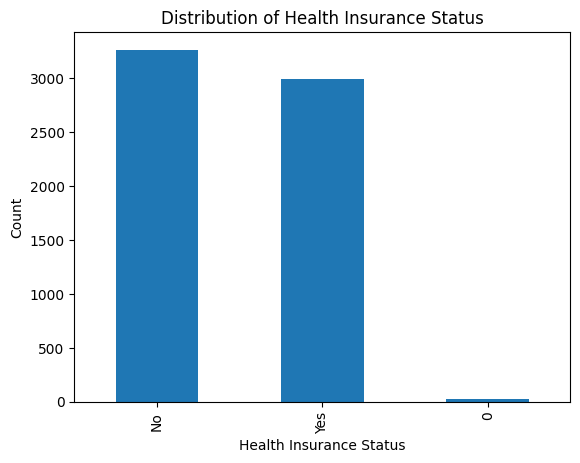

In [61]:
# Bar chart of Health_InsuranceStatus
df['Health_InsuranceStatus'].value_counts().plot(kind='bar')
plt.xlabel('Health Insurance Status')
plt.ylabel('Count')
plt.title('Distribution of Health Insurance Status')
plt.show()


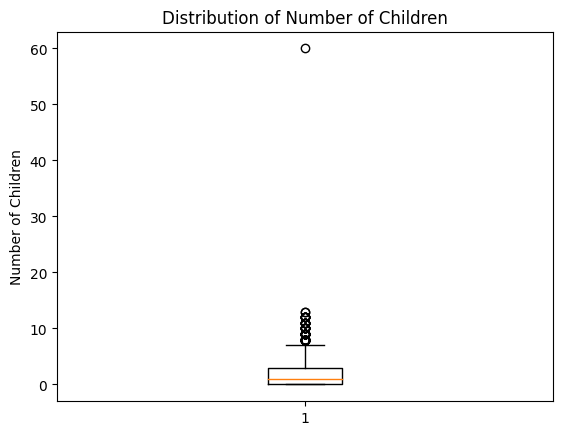

In [62]:
# Box plot of No_Of_Children
plt.boxplot(df['No_Of_Children'].dropna())
plt.ylabel('Number of Children')
plt.title('Distribution of Number of Children')
plt.show()

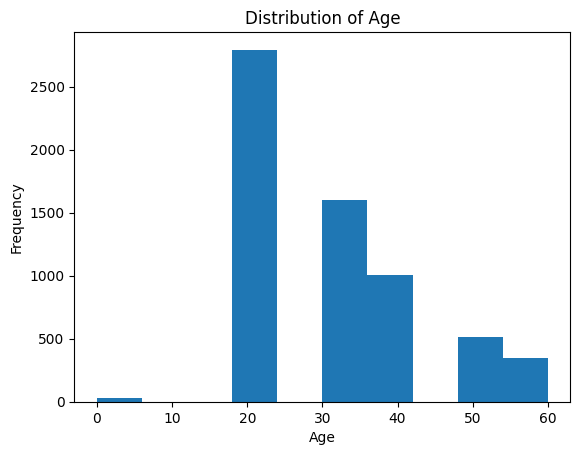

In [59]:
import matplotlib.pyplot as plt

# Histogram of Age
plt.hist(df['Age'].dropna(), bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

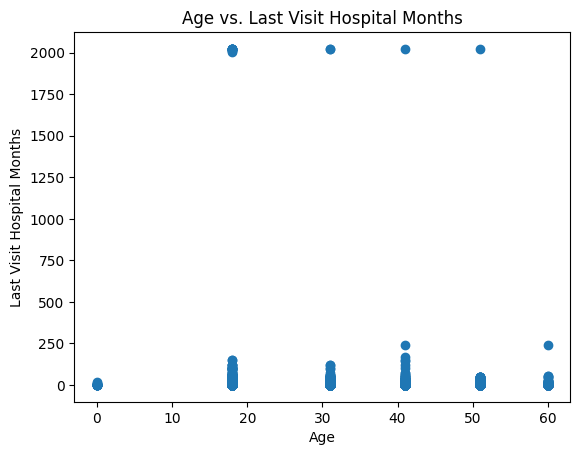

In [60]:
# Scatter plot of Age vs. Last_Visit_Hospital_Months
plt.scatter(df['Age'], df['Last_Visit_Hospital_Months'])
plt.xlabel('Age')
plt.ylabel('Last Visit Hospital Months')
plt.title('Age vs. Last Visit Hospital Months')
plt.show()
